# Covid 19 Proyect

## 1. Setup de las herramientas y carga del Dataset

#### Instalamos e importamos las librerias necesarias inicialmente

In [1]:
%%capture
#Delete above to show install logs

! pip install pandas
! pip install matplotlib
! pip install numpy
! pip install seaborn

import csv
import numpy as np
import pandas as pd
# Next option sets values to cardinal and not scientific float values (for describe) 
pd.set_option('display.float_format', lambda x: '%.5f' % x)
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None

#### Cargamos el Dataset y dado que tiene muchas filas, en lugar de visualizarlo con head() mostraremos las variables con sus estadísticas:

In [2]:
df = pd.read_csv('00-Covid-Data.csv')
df.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,1048575.00000,1048575.00000,1048575.00000,1048575.00000,1048575.00000,1048575.00000,1048575.00000,1048575.00000,1048575.00000,1048575.00000,1048575.00000,1048575.00000,1048575.00000,1048575.00000,1048575.00000,1048575.00000,1048575.00000,1048575.00000,1048575.00000,1048575.00000
mean,1.63219,8.98057,1.49926,1.19076,79.52288,3.34683,41.79410,49.76558,2.18640,2.26057,2.24263,2.29813,2.12899,2.43514,2.26181,2.12518,2.25718,2.21433,5.30565,79.55397
std,0.48221,3.72328,0.50000,0.39290,36.86889,11.91288,16.90739,47.51073,5.42424,5.13226,5.11409,5.46284,5.23640,6.64668,5.19485,5.17545,5.13535,5.32310,1.88117,36.82307
min,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,0.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000
25%,1.00000,4.00000,1.00000,1.00000,97.00000,2.00000,30.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,3.00000,97.00000
50%,2.00000,12.00000,1.00000,1.00000,97.00000,2.00000,40.00000,97.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,6.00000,97.00000
75%,2.00000,12.00000,2.00000,1.00000,97.00000,2.00000,53.00000,97.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,7.00000,97.00000
max,2.00000,13.00000,2.00000,2.00000,99.00000,99.00000,121.00000,98.00000,98.00000,98.00000,98.00000,98.00000,98.00000,98.00000,98.00000,98.00000,98.00000,98.00000,7.00000,99.00000


### Indice
- sex: 1 for female and 2 for male.
- age: of the patient.
- final_classification: covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.
- patient type: type of care the patient received in the unit. 1 for returned home and 2 for hospitalization.
- pneumonia: whether the patient already have air sacs inflammation or not.
- pregnancy: whether the patient is pregnant or not.
- diabetes: whether the patient has diabetes or not.
- copd: Indicates whether the patient has Chronic obstructive pulmonary disease or not.
- asthma: whether the patient has asthma or not.
- inmsupr: whether the patient is immunosuppressed or not.
- hypertension: whether the patient has hypertension or not.
- cardiovascular: whether the patient has heart or blood vessels related disease.
- renal chronic: whether the patient has chronic renal disease or not.
- other disease: whether the patient has other disease or not.
- obesity: whether the patient is obese or not.
- tobacco: whether the patient is a tobacco user.
- usmr: Indicates whether the patient treated medical units of the first, second or third level.
- medical unit: type of institution of the National Health System that provided the care.
- intubed: whether the patient was connected to the ventilator.
- icu: Indicates whether the patient had been admitted to an Intensive Care Unit.
- date died: If the patient died indicate the date of death, and 9999-99-99 otherwise.

# 2. Data Preprocessing

## 2.1 Normalización y valores nulos

#### Sabemos que los valores 97,98 y 99 corresponden a valores nulos, así que hay que reemplazarlos por valores nulos (NaN).

#### Por otro lado, en multitud de valiables el valor 2 corresponde a la ausencia o negativo de la variable. 
#### Para el entrenamiento y predicciones, realizaremos un One-Hot-Encoding manual:

- Nos aseguramos de no alterar las columnas SEX, AGE, PATIENT_TYPE y CLASIFFICATION_FINAL.
- Reemplazamos los valores 2 (Negativos) por 0
- Reemplazamos los valores 97, 98 y 99 por 'valor nulo'
- Definimos la función que nos mostrará una vista más avanzada de los nulos y la mostramos

In [3]:
excluded = [c for c in df.columns if c not in ['SEX','AGE','PATIENT_TYPE','CLASIFFICATION_FINAL']]

df[excluded] = df[excluded].replace(2, 0)
df[excluded] = df[excluded].replace(97, np.nan)
df[excluded] = df[excluded].replace(98, np.nan)
df[excluded] = df[excluded].replace(99, np.nan)

def check_nulls():
    total = df.isnull().sum().sort_values(ascending=False)
    percent_nulls = round(df.isnull().sum() / df.isnull().count() * 100, 1).sort_values(ascending=False)

    missing_data = pd.concat([total, percent_nulls], axis=1, keys=['Total', '%'])
    return missing_data
    
missing_data = check_nulls()
missing_data.head(20)

,Total,%
ICU,856032,81.60000
INTUBED,855869,81.60000
PREGNANT,527265,50.30000
PNEUMONIA,16003,1.50000
OTHER_DISEASE,5045,0.50000
INMSUPR,3404,0.30000
DIABETES,3338,0.30000
TOBACCO,3220,0.30000
HIPERTENSION,3104,0.30000
CARDIOVASCULAR,3076,0.30000


#### Podemos ver una alta cantidad de valores nulos en las variables ICU, INTUBED (Solo en pacientes hospitalizados) y PREGNANT (Solo en mujeres), lo que provocará problemas en el entrenamiento, asi que prescindiremos de estas.

#### Otras variables tienen valores nulos, principalmente PNEUMONIA, pero corresponde a menos del 1,5% del total, asi que podemos eliminar sus filas.

- Eliminamos las columnas ICU, INTUBED y PREGNANT
- Del restante, podemos eliminar todas sus filas con valores nulos

In [ ]:
df.drop(columns=['INTUBED', 'PREGNANT', 'ICU'], inplace=True)
df = df.dropna()

print(df.shape)
missing_data = check_nulls()
missing_data.head(20)

In [5]:
df.shape

(1025152, 18)

- Hemos limpiado cualquier valor nulo y pasado de tener 1.048.575 filas a  1.025.152, un buen resultado.


## 2.2 Creación y corrección de variables binarias

### A continuación crearemos las variables que usaremos como objetivo: INFECTED, HOSPITALIZED Y DEATH

#### Creamos la variable INFECTED, 1 si el paciente está infectado y 0 si es negativo o inconcluso. 
- La variable CLASIFFICATION_FINAL con valores 1-3 son positivos y 4-7 negativos

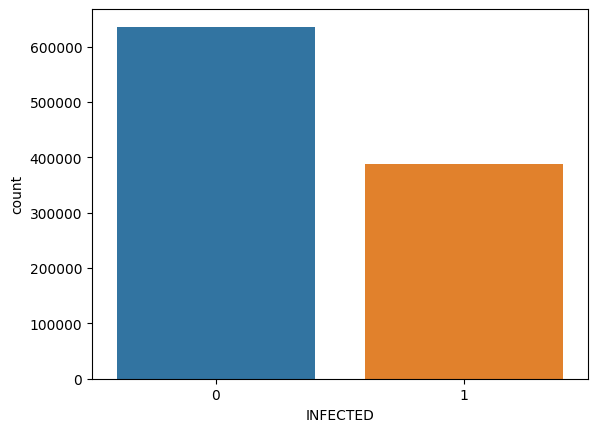

In [6]:
df['INFECTED'] = [0 if each > 3 else 1 for each in df['CLASIFFICATION_FINAL']]
sns.countplot(data=df, x='INFECTED');

- Vemos un problema de desbalanceamiento, el cual resolveremos más adelante...

#### Vamos a renombrar la variable 'PATIENT_TYPE' como 'HOSPITALIZED' y establecer 1 para hospitalizados y 0 para los que no:

- El patient type tiene valores 2 para pacientes hospitalizados y 1 para retornados a casa.

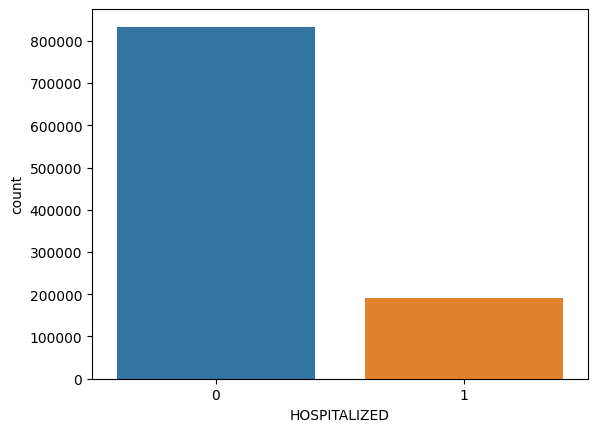

In [7]:
df = df.rename(columns = {'PATIENT_TYPE':'HOSPITALIZED'})
df['HOSPITALIZED'] = [1 if value==2 else 0 for value in df.HOSPITALIZED]
sns.countplot(data=df, x='HOSPITALIZED');

#### Sabemos que la variable DATE_DIED nos proporciona la información de quien falleció y quien nó. No usaremos estas fechas, sino una nueva columna que indica si falleció

- Los valores 9999-99-99 corresponden a personas que vivieron
- Siguiendo la linea de variables "negativas", la nueva columna será llamada DEATH y contendrá el valor 1 para los fallecidos

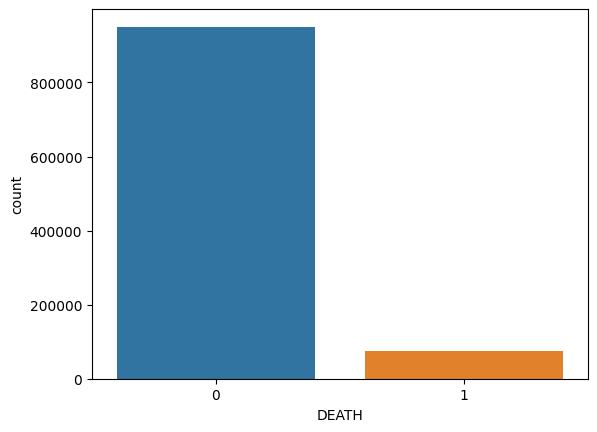

In [8]:
df["DEATH"] = [0 if value=="9999-99-99" else 1 for value in df.DATE_DIED]
sns.countplot(data=df, x='DEATH');

### Podemos ver a simple vista en los gráficos anteriores que tenemos un problema de desbalanceamiento, el cual resolveremos más adelante...

#### Por último, eliminamos las variables que ya no son necesarias y comprobamos las variables que permanecerán y que estas son binarias (Excepto AGE) .

In [9]:
df.drop(columns=['DATE_DIED','USMER', 'MEDICAL_UNIT', 'CLASIFFICATION_FINAL'], inplace=True)
df.nunique()

SEX                 2
HOSPITALIZED        2
PNEUMONIA           2
AGE               121
DIABETES            2
COPD                2
ASTHMA              2
INMSUPR             2
HIPERTENSION        2
OTHER_DISEASE       2
CARDIOVASCULAR      2
OBESITY             2
RENAL_CHRONIC       2
TOBACCO             2
INFECTED            2
DEATH               2
dtype: int64

# 3. DATA ANALISYS

## 3.1 Estudio y análisis de las variables objetivo

#### Para facilitar la visualización, vamos a separar y ordenar las variables
#### Posteriormente mostraremos sus distribuciones:

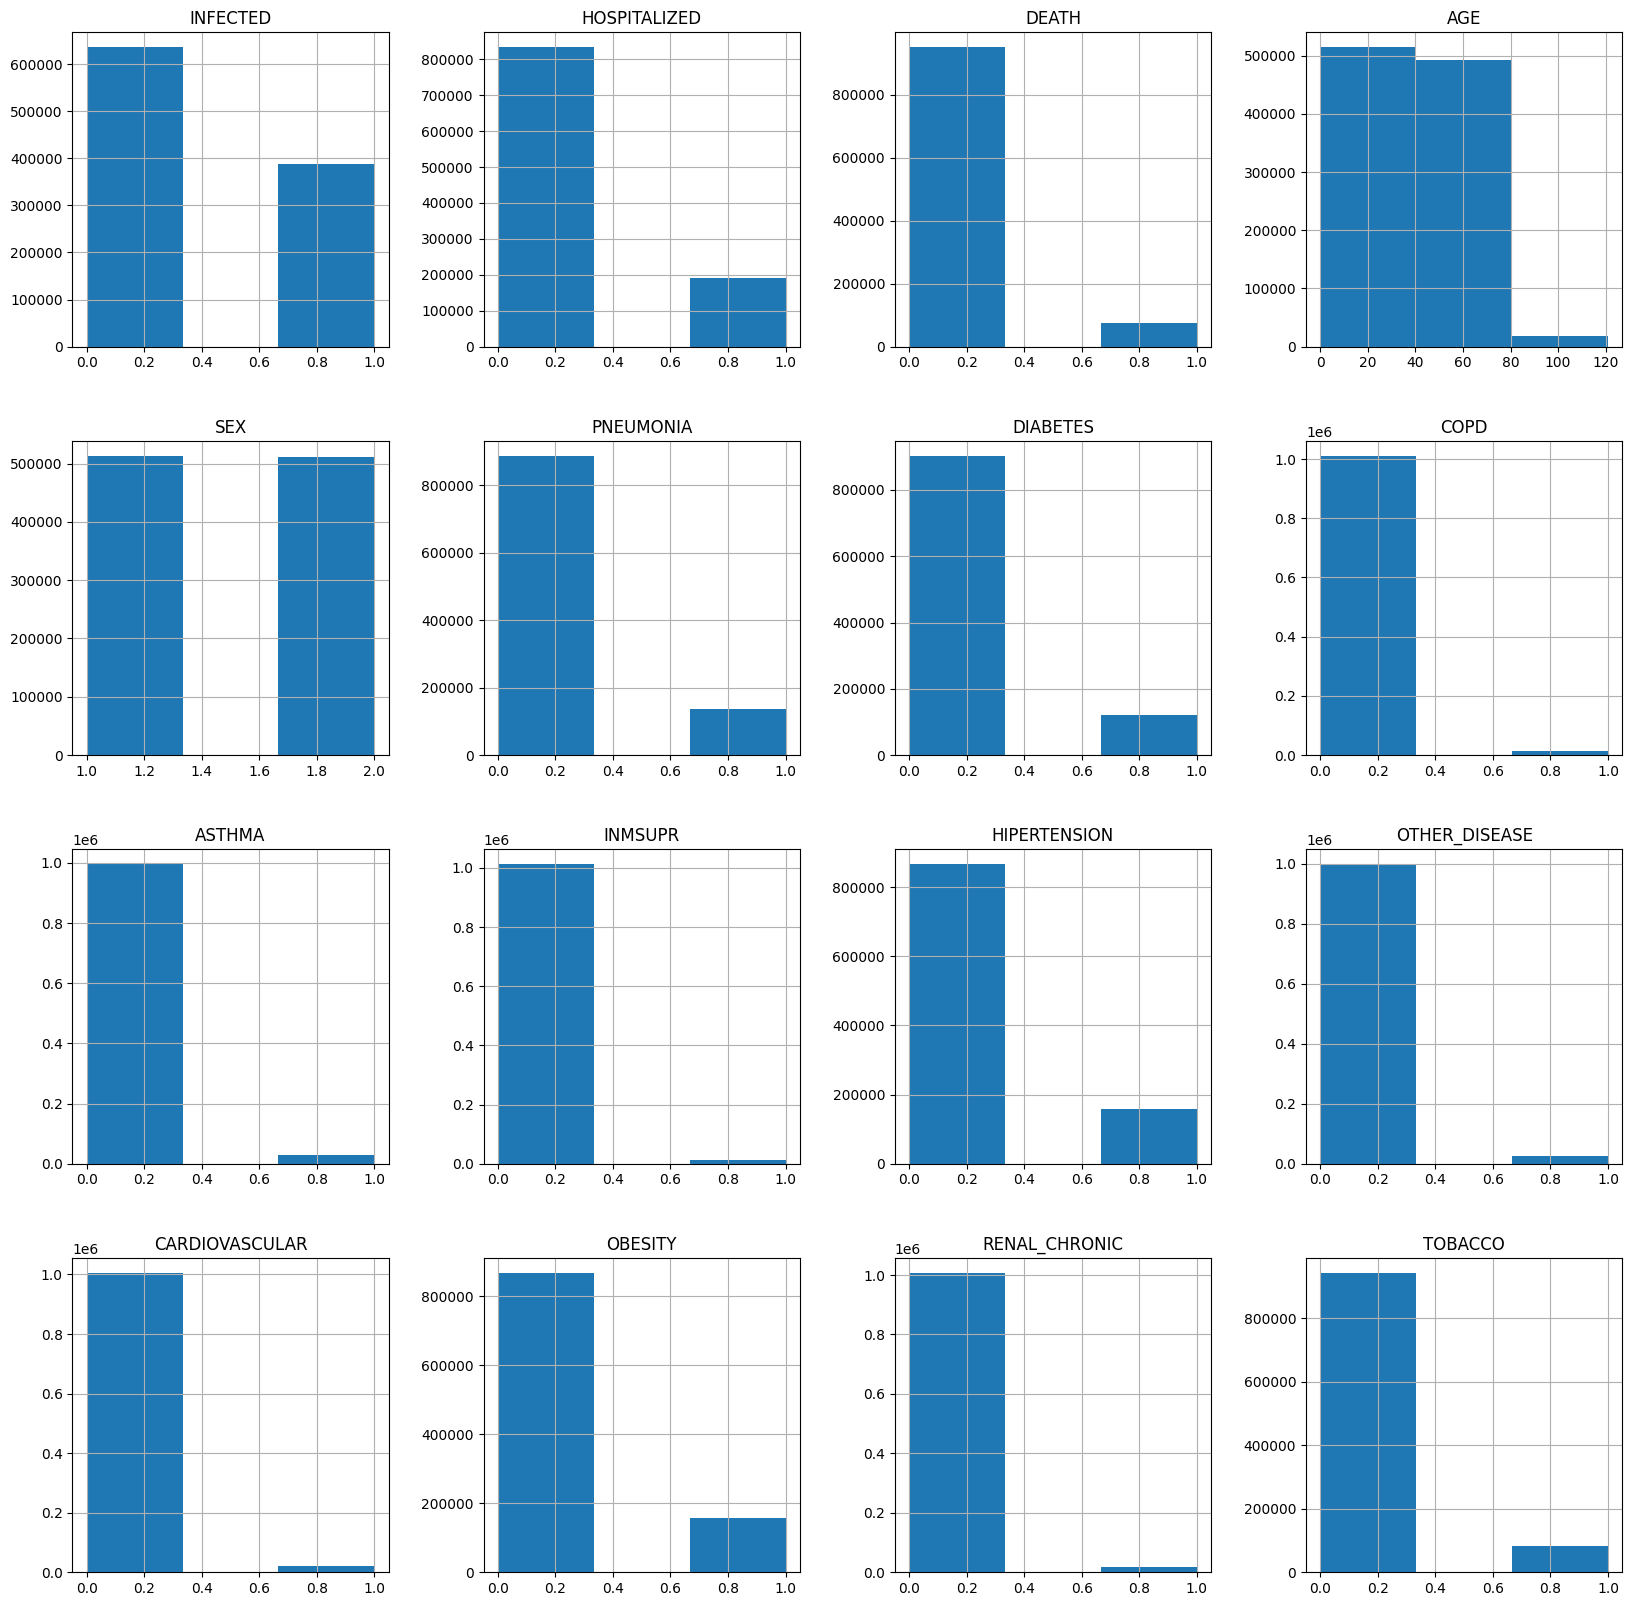

In [10]:
cols_ordered = ['INFECTED', 'HOSPITALIZED', 'DEATH', 'AGE', 'SEX']
othercols = [c for c in df.columns if c not in cols_ordered]
df = df[cols_ordered+othercols]

df.hist(bins=3, figsize=(20,20));

- Podemos ver que la mayoria de variables estan descompensadas en favor a factores positivos como estar sano, no ser hospitalizado, no fumar...

#### Vamos a comprobar que variables estan correlacionadas con estar infectado, ser hospitalizado y morir:

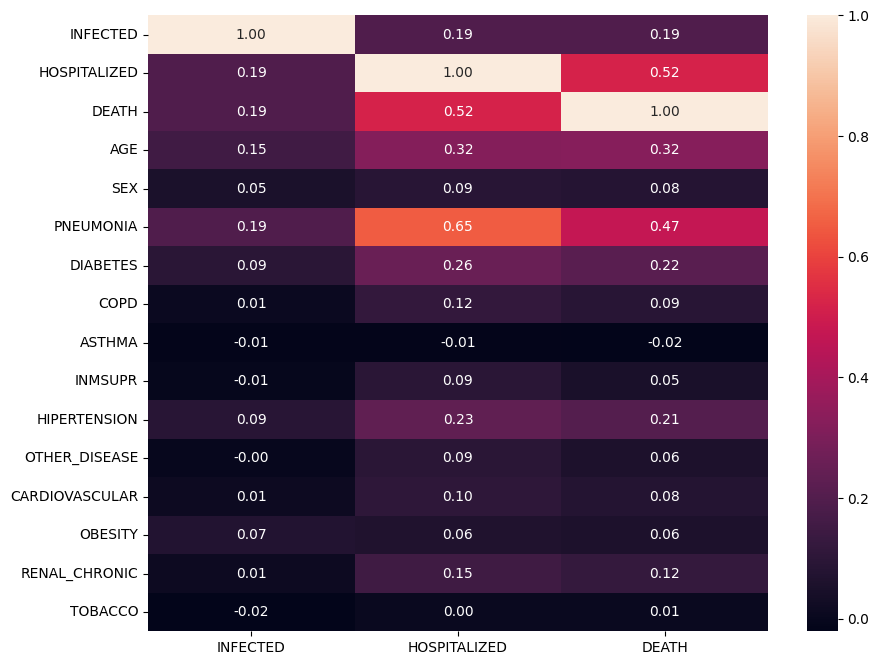

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr().loc[:,['INFECTED', 'HOSPITALIZED', 'DEATH']], fmt=".2f", annot=True);

- Infectados: Ligera correlación con la edad, diabetes, hipertensión y obesidad
- Hospitalizados: Gran correlación con pacientes con pneumonia y de alta edad, seguidos de diabeticos e hipertensos.
- Muerte: Alta correlación en pacientes con pneumonia, hypertensión y alta edad, ligera correlación con diabeticos e hipertensos.

Extra: Resaltar la baja correlación que tienen aspectos de salud como ser asmatico y fumador.

#### Vamos a comprobar las correlaciones entre enfermedades, patologías y habitos:

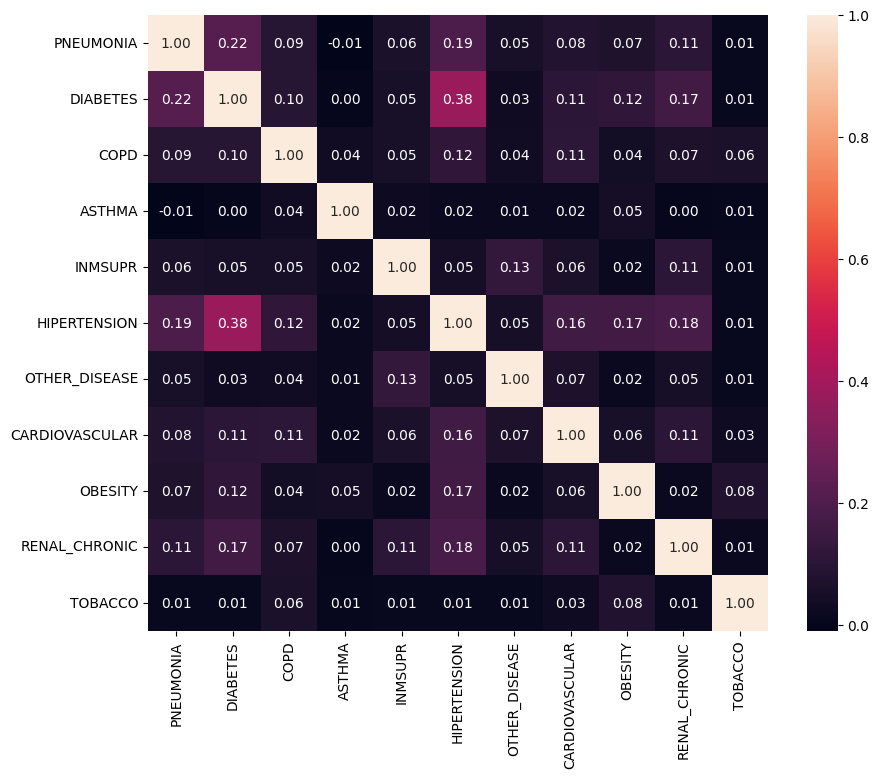

In [12]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr().loc[othercols,othercols], fmt=".2f", annot=True);

- Alta correlación entre hypertensión con otras patologías, como la diabetes, obesidad o la nefropatía crónica (renal_chronic) 
- Los pacientes con pneumonia, hipertensión y nefropatía crónica parecen ser más propensos a tener otras patologías.
- El tabaco se correlaciona ligeramente con COPD (Chronic obstructive pulmonary Disease) y la obesidad.

#### Vamos a analizar la edad y como esta afecta a diferentes variables:
- En primer lugar limitamos la muestra a personas menores de 100 años, ya que al haber tan pocas afectan a las distribuciones de probabilidad.

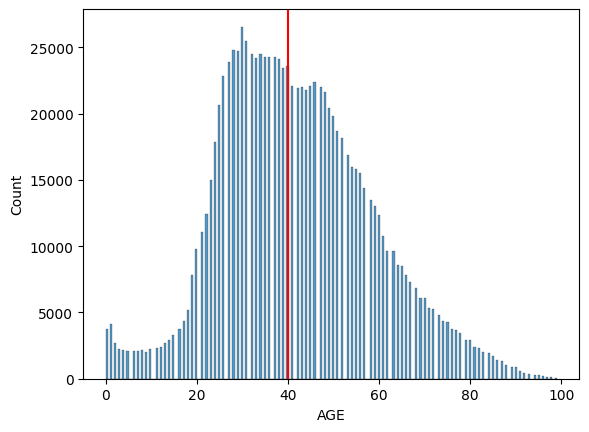

In [13]:
df = df.loc[df.AGE < 100]
sns.histplot(x=df.AGE)
plt.axvline(df['AGE'].median(), color='red');

- Las personas de la muestra tienen principalmente una edad entre 20 y 65 años
- Los personas de la muestra tienen una media de 41 años

#### Veamos en que edades hay más infectados, hospitalizados y muertos:

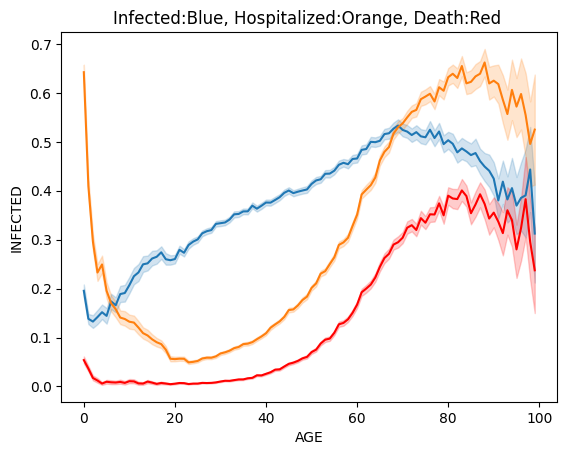

In [14]:
sns.lineplot(x=df.AGE, y=df.INFECTED.eq(1), data=df)
sns.lineplot(x=df.AGE, y=df.HOSPITALIZED.eq(1), data=df)
sns.lineplot(x=df.AGE, y=df.DEATH.eq(1), data=df, color='red')
plt.title("Infected:Blue, Hospitalized:Orange, Death:Red ", color="black", fontsize=12);

- Podemos ver como a medida que aumenta la edad, mayor es el riesgo de infección, pneumonia y muerte.
- Se aprecia bastante correlación entre pneumonia y muerte.
- Hay muy pocos datos de personas de más de 90 años y esto afecta a la ultima parte del gráfico, no siendo esta fiable.

#### Veamos como afecta la edad a diferentes aspectos:

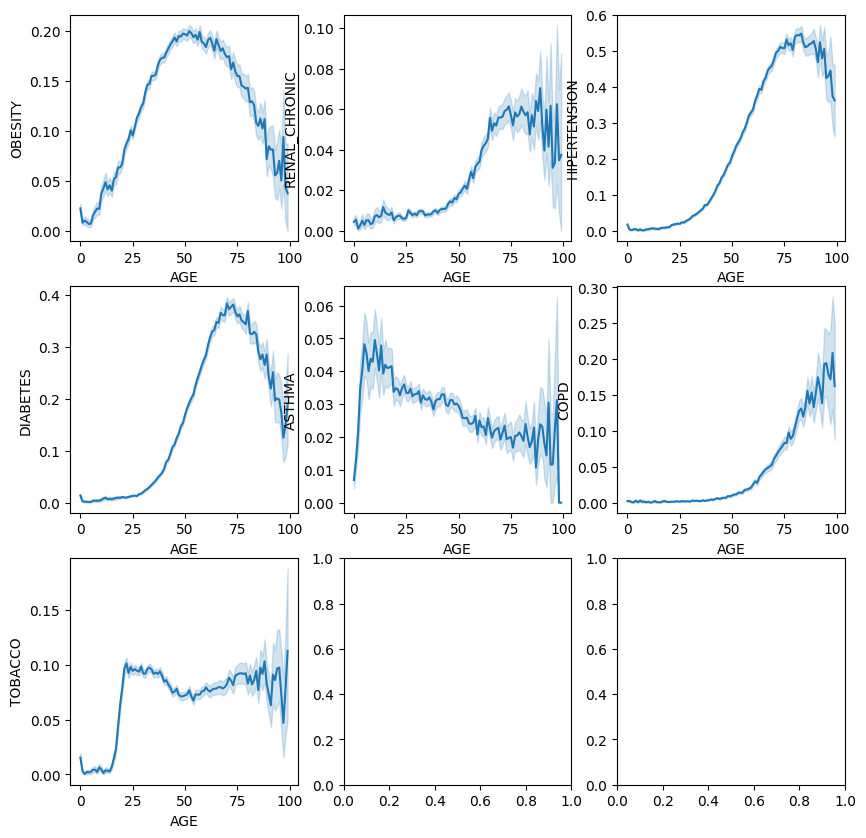

In [15]:
fig, axs = plt.subplots(3, 3, figsize=(10, 10))

sns.lineplot(x=df.AGE, y=df.OBESITY.eq(1), data=df, ax=axs[0, 0])
sns.lineplot(x=df.AGE, y=df.RENAL_CHRONIC.eq(1), data=df, ax=axs[0, 1])
sns.lineplot(x=df.AGE, y=df.HIPERTENSION.eq(1), data=df, ax=axs[0, 2])
sns.lineplot(x=df.AGE, y=df.DIABETES.eq(1), data=df, ax=axs[1, 0])
sns.lineplot(x=df.AGE, y=df.ASTHMA.eq(1), data=df, ax=axs[1, 1])
sns.lineplot(x=df.AGE, y=df.COPD.eq(1), data=df, ax=axs[1, 2])
sns.lineplot(x=df.AGE, y=df.TOBACCO.eq(1), data=df, ax=axs[2, 0]);

- El riesgo de tener enfermedades y patologías aumenta con la edad 


# 4. Machine Learning

#### Vamos a entrenar modelos de ML con el objetivo de predecir si un paciente está infectado y tiene riesgo de morir.

## 4.1 Setup de las herramientas

#### Instalamos e importamos las librerias

In [16]:
%%capture
#Delete above to show install logs
! pip install xgboost
! pip install scikit-learn
! pip install imblearn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

#### Definimos funciones que nos serán utiles:

In [17]:
#Creamos la funcion show_metrics que nos ayudará a interpretar resultados.
def show_metrics(clf, y_test, y_pred):
    print(f'Accuracy score: {int(accuracy_score(y_test, y_pred)*100)}%\n')
    print(classification_report(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=clf.classes_)
    disp.plot()
    plt.show()

## 4.2 Reacondicionamiento de los datos:

### Separamos la variable objetivo del Dataset
#### Podemos elegir INFECTED, DEATH, HOSPITALIZED o cualquier otra...
- En este caso intentaremos predecir si un paciente podía morir

In [19]:
y_objective = 'DEATH'
X = df.drop(columns=y_objective)
y = df[y_objective]

#### Vamos a reescalar la variable AGE para mejorar el entrenamiento

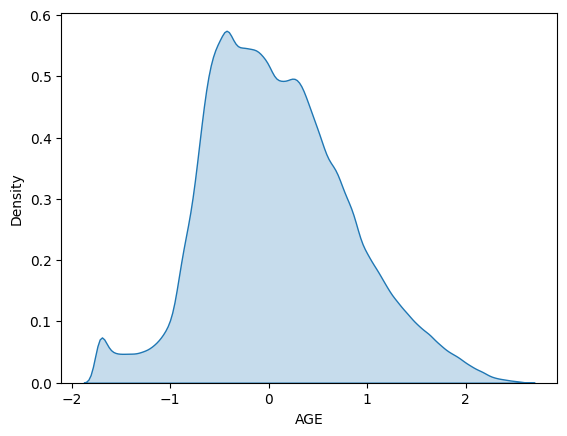

In [20]:
X.AGE = RobustScaler().fit_transform(X.AGE.values.reshape(-1,1))
sns.kdeplot(data=X, x='AGE', fill=True);

#### Ya pudimos comprobar el desbalanceamiento que hay en las variables objetivo:

- Realizaremos un Undersampling, es decir, igualar el numero de filas con 1 y 0 en la variable objetivo reduciendo filas que contengan el mayor numero de uno de estos valores 
- Por lo general, hay menos infectados, hospitalizados, y muertos, por tanto se reducirán filas que contengan sanos, no hospitalizados o vivos

In [21]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)

print("x :",X.shape)
X,y = rus.fit_resample(X,y)
print("x :",X.shape)

x : (1024962, 15)
x : (149368, 15)


- Podemos ver que el numero de filas antes y despues, y que estas se ha reducido

#### Separamos los dataset X e y en Train y Test

In [22]:
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print("x_train :",x_train.shape)
print("x_test :",x_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)

x_train : (119494, 15)
x_test : (29874, 15)
y_train : (119494,)
y_test : (29874,)


## 4.3 Regresión logística simple

#### Creamos la Regresión Logistica, la entrenamos con los datos 'train', realizamos las predicciones y mostramos los resultados: 

Accuracy score: 90%

              precision    recall  f1-score   support

           0       0.92      0.89      0.91     14827
           1       0.90      0.92      0.91     15047

    accuracy                           0.91     29874
   macro avg       0.91      0.91      0.91     29874
weighted avg       0.91      0.91      0.91     29874



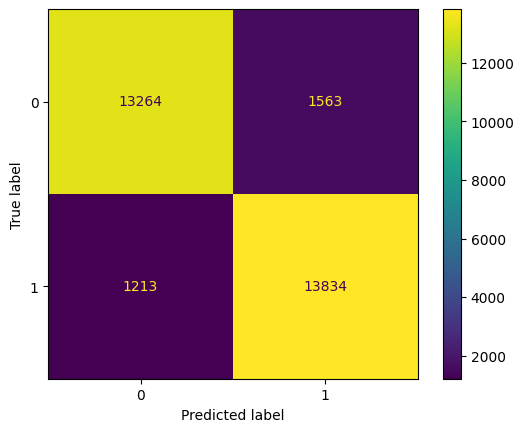

In [23]:
logreg = LogisticRegression(solver='newton-cholesky', multi_class='auto')
logreg.fit(x_train, y_train)

y_pred = logreg.predict(x_test)

show_metrics(logreg, y_test, y_pred)

#### Tras probar, todos los solver (liblinear, sag, saga, newton-cg) tienen una precisión del 90%

#### El f1-score es de 90% y 91%, esto quiere decir que:
- Acertó un 90% de personas que murieron.
- Acertó un 91% de personas que vivieron.

#### Esto es el reflejo de:

- 13113 Verdaderos positivos
- 13867 Verdaderos negativos
- 1610 Falsos positivos
- 1296 Falsos negativos

## 4.4 Random Forest

#### Vamos a probar ahora un bosque de regresión
- Importamos la libreria, creamos el modelo, lo entrenamos, creamos unas predicciones y mostramos resultados:

Accuracy score: 90%

              precision    recall  f1-score   support

           0       0.92      0.88      0.90     14827
           1       0.89      0.93      0.91     15047

    accuracy                           0.90     29874
   macro avg       0.91      0.90      0.90     29874
weighted avg       0.91      0.90      0.90     29874



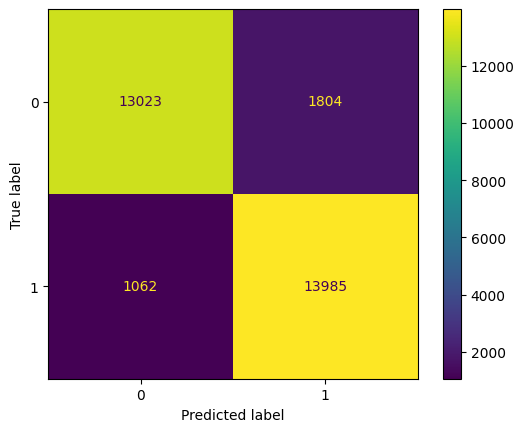

In [24]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=0)
random_forest.fit(x_train, y_train)

y_pred = random_forest.predict(x_test)

show_metrics(random_forest, y_test, y_pred)

- Podemos observar que el bosque de regresión arroja similares resultados que la regresión logística

## 4.5 Nayve Bayes

#### Vamos a probar ahora con Nayve Bayes
- Creamos el modelo, lo entrenamos con los datos 'train', realizamos las predicciones y mostramos los resultados: 

Accuracy score: 86%

              precision    recall  f1-score   support

           0       0.85      0.87      0.86     14827
           1       0.87      0.85      0.86     15047

    accuracy                           0.86     29874
   macro avg       0.86      0.86      0.86     29874
weighted avg       0.86      0.86      0.86     29874



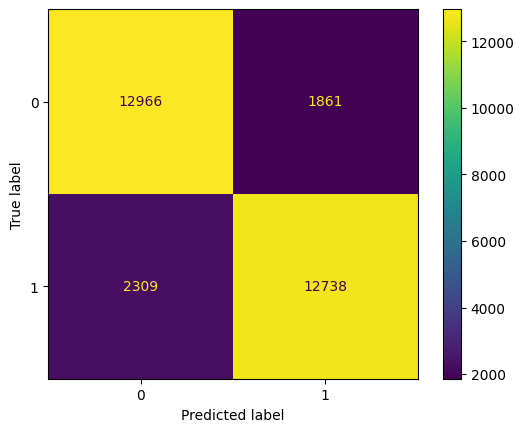

In [25]:
from sklearn.naive_bayes import GaussianNB

nb=GaussianNB()
nb.fit(x_train,y_train)

y_pred = nb.predict(x_test)

show_metrics(nb, y_test, y_pred)

- Podemos observar que Nayve arroja peores resultados que las predicciones anteriores

## 4.6 XGBoost Classifier

XGBoost utiliza árboles de decisiones de gradiente boosteados que consiste en entrenar muchos árboles de decisiones pequeños y simples de manera secuencial, donde cada árbol trata de corregir los errores del árbol anterior. 

Esto permite que el modelo final tenga una mayor precisión y capacidad de generalización.

#### Vamos a probar ahora con el clasificador de XGBoost
- Creamos el modelo XGBoost, lo entrenamos con los datos 'train', realizamos las predicciones y mostramos los resultados: 

Accuracy score: 91%

              precision    recall  f1-score   support

           0       0.94      0.88      0.91     14827
           1       0.89      0.95      0.92     15047

    accuracy                           0.91     29874
   macro avg       0.92      0.91      0.91     29874
weighted avg       0.92      0.91      0.91     29874



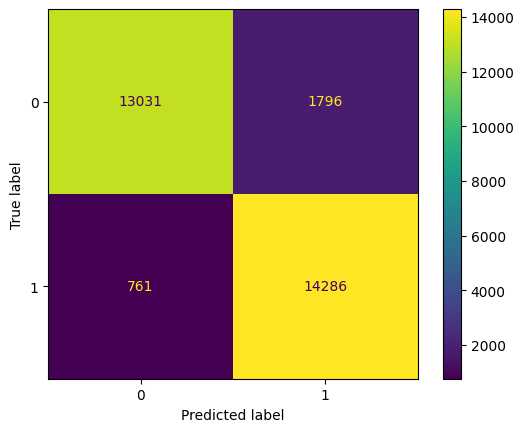

In [26]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators = 200, learning_rate=0.1)
xgb.fit(x_train, y_train)

y_pred = xgb.predict(x_test)

show_metrics(xgb, y_test, y_pred)

#### Hemos obtenido un 91% de puntuación y F-Score, muy buen resultado.
- El clasificador de XGBoost es el más preciso, por tanto continuaremos desarrollando con este...

## 4.7 Importancia de las variables

#### Lás gráficas anteriores no mostraban la importancia en la predicción de cada una de las variables, de modo que vamos a extraerlas y mostrarlas en una gráfica:

- Se extraen las feature importances del modelo xgb a una tabla
- Creamos las cabeceras de una tabla
- Ordenamos los valores

   Nombres de Variables  Importancias
0          HOSPITALIZED       0.89560
1             PNEUMONIA       0.05904
2              INFECTED       0.01160
3                   AGE       0.00984
4              DIABETES       0.00379
5         RENAL_CHRONIC       0.00333
6                   SEX       0.00320
7               OBESITY       0.00246
8         OTHER_DISEASE       0.00190
9          HIPERTENSION       0.00188
10              INMSUPR       0.00170
11                 COPD       0.00159
12       CARDIOVASCULAR       0.00148
13              TOBACCO       0.00131
14               ASTHMA       0.00128


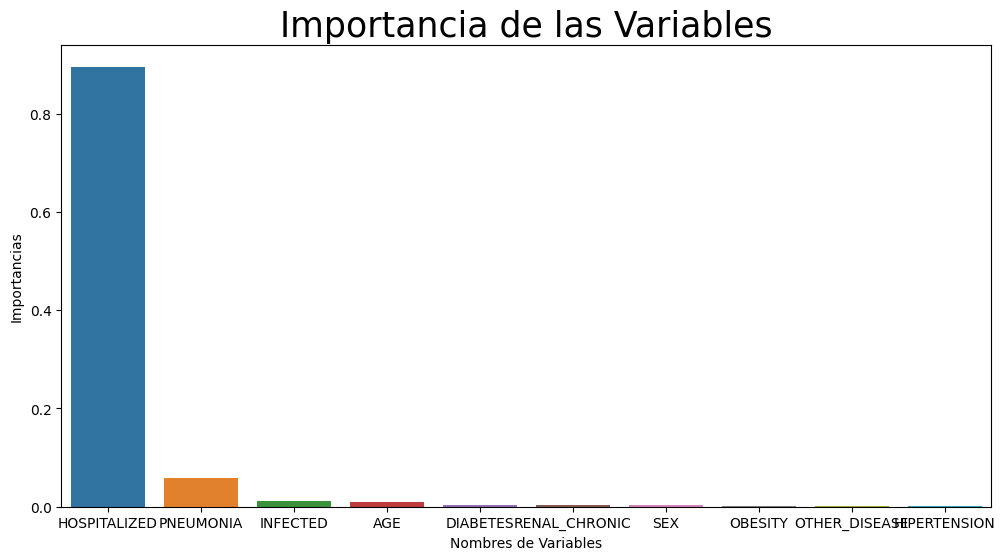

In [27]:
df_importances = pd.DataFrame(list(X), xgb.feature_importances_)
df_importances.columns = ["Nombres de Variables"]
df_importances["Importancias"] = df_importances.index
df_importances = df_importances.sort_values(by = "Importancias", ascending = False)
df_importances.index = np.arange(0,len(df_importances))
print(df_importances)

plt.figure(figsize = (12,6))
plt.title("Importancia de las Variables", fontsize = 25)
sns.barplot(x = "Nombres de Variables", y = "Importancias", data = df_importances.sort_values(
    by = "Importancias", ascending=False)[0:10]);

#### Se observa que:
- Ser hospitalizado es un indicador de peligro de muerte
- La pneumonia es la principal enfermedad que aumenta la de posibilidad de muerte
- Como es de esperar, estar infectado aumenta el riesgo de muerte
- La edad tambien influye en el riesgo de muerte
- Por algun motivo el sexo tiene más influencia que distintas aflicciones como la obesidad.

### Vamos a ponerselo más dificil y comprobar resultados:
- Eliminamos las columnas HOSPITALIZED, INFECTED y PNEUMONIA, AGE y SEX, para hacér enfasis en otras enfermedades o aflicciones.
- Volvemos a entrenar con XGBoost y mostramos los resultados

Accuracy score: 70%

              precision    recall  f1-score   support

           0       0.67      0.78      0.72     14827
           1       0.74      0.63      0.68     15047

    accuracy                           0.70     29874
   macro avg       0.71      0.70      0.70     29874
weighted avg       0.71      0.70      0.70     29874



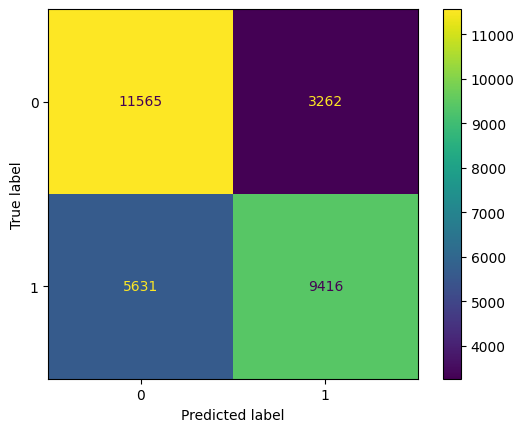

In [28]:
X.drop(columns=['HOSPITALIZED','INFECTED', 'PNEUMONIA', 'AGE', 'SEX'], errors='ignore', inplace=True)
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)

show_metrics(xgb, y_test, y_pred)

#### La precisión y el F-score han disminuido, pero sigue siendo un buen resultado 

  Nombres de Variables  Importancias
0         HIPERTENSION       0.52307
1             DIABETES       0.31026
2                 COPD       0.05049
3        RENAL_CHRONIC       0.03124
4        OTHER_DISEASE       0.02632
5              OBESITY       0.01806
6              INMSUPR       0.01640
7       CARDIOVASCULAR       0.01206
8               ASTHMA       0.00989
9              TOBACCO       0.00220


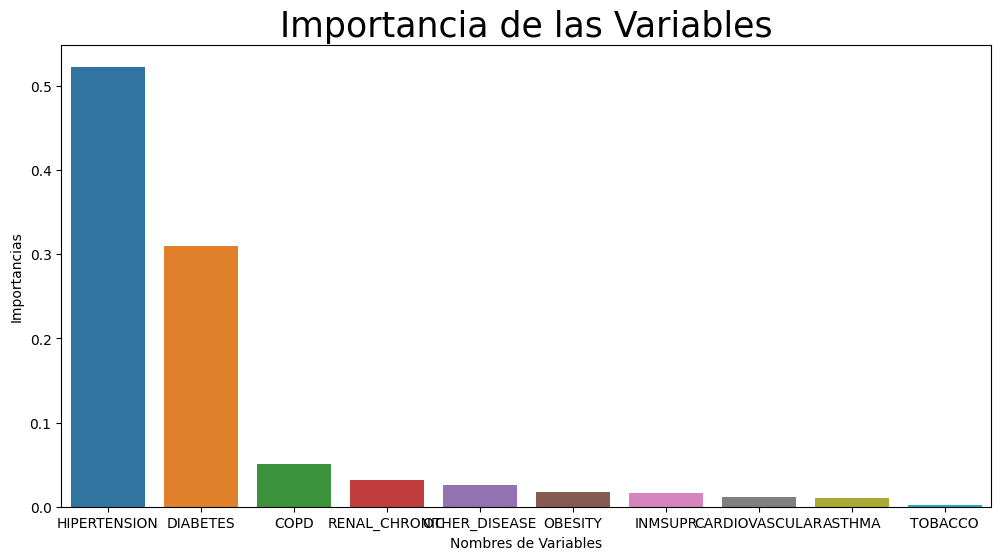

In [29]:
df_importances = pd.DataFrame(list(X), xgb.feature_importances_)
df_importances.columns = ["Nombres de Variables"]
df_importances["Importancias"] = df_importances.index
df_importances = df_importances.sort_values(by = "Importancias", ascending = False)
df_importances.index = np.arange(0,len(df_importances))
print(df_importances)

plt.figure(figsize = (12,6))
plt.title("Importancia de las Variables", fontsize = 25)
sns.barplot(x = "Nombres de Variables", y = "Importancias", data = df_importances.sort_values(
    by = "Importancias", ascending=False)[0:10]);

- Podemos ver como la diabetes y la hipertensión son las enfermedades más significativas en cuanto a riesgo de muerte.
- COPD (Chronic obstructive pulmonary Disease) y la nefropatía crónica (renal_chronic) también tienen una relación significativa.

# 5. Conclusiones

#### Los resultados en cuanto a correlaciones arrojados por nuestro análisis se asemejan bastante a la importancia de las variables de el modelo creado con XGBoost, esto muestra cierta consistencia.

- La pneumonía aumenta drasticamente el riesgo de muerte.
- A mayor edad mayor es el riesgo de hospitalización y muerte
- La diabetes y la hypertensión aumentan los riesgos de muerte.
- Alta correlación entre hypertensión con otras patologías, como la diabetes, obesidad o la nefropatía crónica (renal_chronic) 
- Los pacientes con pneumonia, hipertensión y nefropatía crónica parecen ser más propensos a tener otras patologías.